# Iterative depth-first search (DFS) 

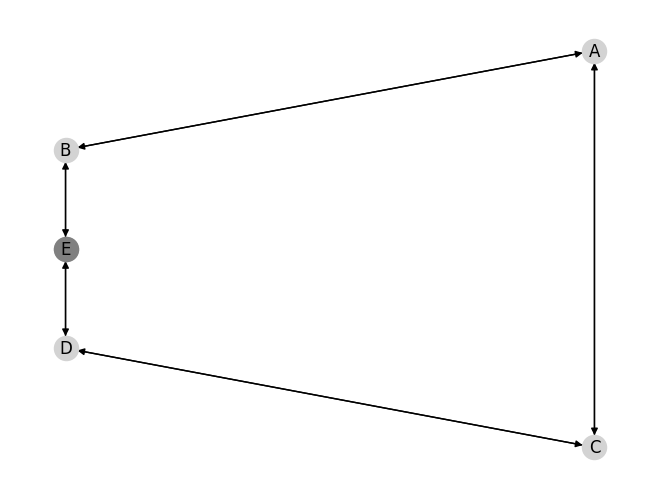

In [37]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
#G={'A':['B','C'],'B':['D','E'],'C':['E'],'D':['E']}
G={'A':['B','C'],'B':['A','E'],'C':['A','D'], 'D':['C','E'],'E':['B','D']}
source='A'
Target=['E']
nxG=nx.DiGraph(G)
pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')

## DFS algorithm with maximum depth m
DFS(G,s',m)  
> Open = InitStack(s')  
> Closed = $\emptyset$  
> while Open != $\emptyset$  
>>  s = Pop(Open)  
>>  if Target(s) return s  
>>  Closed = Closed $\cup$ $\{s\}$  
>>  if Depth(s) < m
>>>   for n $\in$ Adjacents(G,s)  
>>>>    if n $\notin$ Closed  
>>>>>     if n $\notin$ Open  
>>>>>>      Push(Open,n)    
> return NULL

## Iterative DFS algorithm
IDFS(G,s)
> for m = 0, 1, 2, ...
>>  if (r = DFS(G,s,m)) $\neq$ NULL
>>>    return r

### Iterative DFS implementation returning the target node that was reached

In [38]:
# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# maxd is the maximum depth
# target is the list of target nodes
def dfs(G, source, maxd, Target):
  Open = [(source,0)]
  Closed = []
  while Open != []:
    (node,d) = Open.pop(-1)
    if node in Target: return node
    Closed.append(node)
    if (d < maxd):
      for child in G[node]:
        if child not in Closed:
          if child not in [n for (n,_) in Open]:
            Open.append((child,d+1))
  return None

def idfs(G,source, maxd, Target):
  for d in range(maxd+1):
    r = dfs(G,source,d,Target)
    if r != None:
      return r

print(idfs(G,'A',3,Target))

E


### Iterative DFS implementation graphically showing the sequence of nodes visited

E


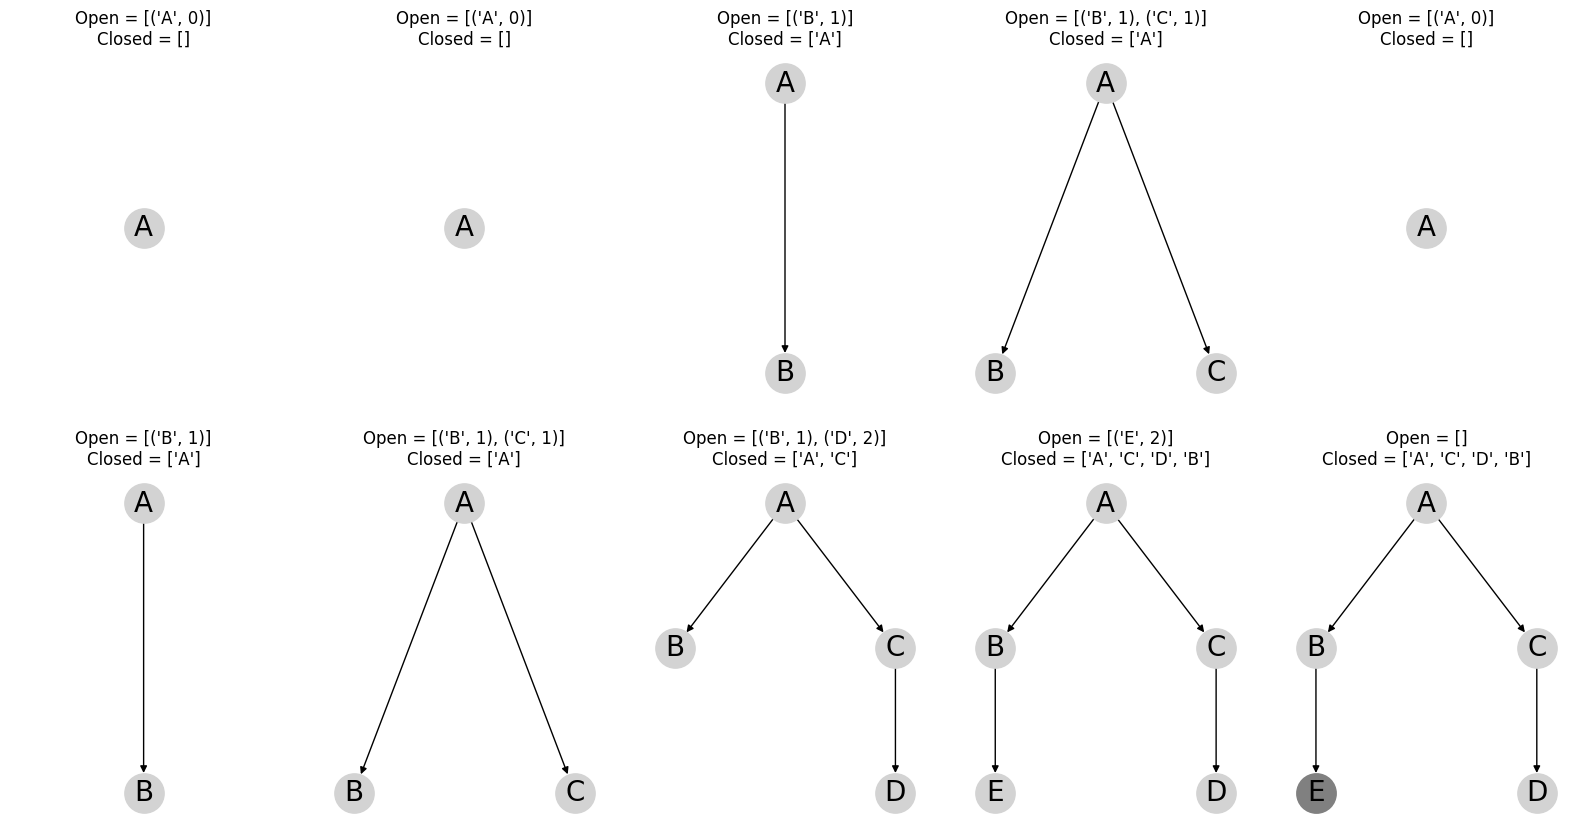

In [39]:
import matplotlib.pyplot as plt

nrows=2; ncols=5
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
axes = iter(fig.axes)

def draw_graph(DG, source, Open, Closed, target=[],):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.set_title("Open = "+str(Open)+"\n"+"Closed = "+str(Closed))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)

# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# Target is the list of target nodes
def dfs(G, source, maxd, Target):
  DG={source:[]}
  Open = [(source,0)]
  Closed = []
  draw_graph(DG, source, Open, Closed)
  while Open != []:
    (node,d) = Open.pop(-1)
    if node in Target: 
      draw_graph(DG, source, Open, Closed, [node])
      return node
    Closed.append(node)
    Adj = DG[node]
    if (d < maxd):
      for child in G[node]:
        if child not in Closed:
          if child not in [n for (n,_) in Open]:
            Adj.append(child); DG[node]=Adj
            DG.update({child:[]})
            Open.append((child,d+1))
            draw_graph(DG, source, Open, Closed)
  return None

def idfs(G,source, maxd, Target):
  for d in range(maxd+1):
    r = dfs(G,source,d,Target)
    if r != None:
      return r

print(idfs(G,'A',3,Target))


DFS is complete, and optimal if actions (edge cost) have identical positive costs  

**Complexity**: G with branching factor $b$ and maximum depth $m$. The asymptotic cost is the same as in DFS, $O(b^m)$ temporal cost and $O(bm)$ spatial cost, but the temporal cost is higher in practice. 